Het bestand "studentInfo.csv" bevat informatie over de in- en uitschrijfdatum van studenten. Wanneer een student nog niet uitgeschreven is, dan is de waarde van uitschrijfdatum None. De datums zijn in volgend formaat dd/mm/jjjj.

Lees het bestand in een panda dataframe.

In [191]:
import pandas as pd
data = pd.read_csv("studentinfo.csv", delimiter=";")

Toon de eerste rijen om na te gaan of dit goed gelukt is.

In [192]:
data.head()

,studentnummer,inschrijfdatum,uitschrijfdatum
0,r012345,11/09/2023,NaN
1,r124589,10/05/2023,01/12/2022
2,r457899,10/10/2023,24/31/2024
3,r012345,11/09/2023,22/12/2023
4,r024589,10/18/2023,100/12/2023


Verwijder alle rijen met in de kolom "uitschrijfdatum" een niet geldige datum (ook None is uiteraard een niet geldige datum). 
Toon opnieuw de eerste rijen om na te gaan of dit goed gelukt is

In [193]:
import re

is_valid_date = r"(0[1-9]|[1-2][0-9]|3[0-1])/(0[1-9]|1[0-2])/(\d{4})"

rows_to_drop = []
for index, date in enumerate(data["uitschrijfdatum"]):
    if date == None or not re.fullmatch(is_valid_date, str(date)):
        rows_to_drop.append(index)
        
data = data.drop(rows_to_drop)
data.head()

,studentnummer,inschrijfdatum,uitschrijfdatum
1,r124589,10/05/2023,01/12/2022
3,r012345,11/09/2023,22/12/2023
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024


Verwijder alle rijen  met een niet geldige datum in de kolom "inschrijfdatum" .

In [194]:
import re

is_valid_date = r"(0[1-9]|[1-2][0-9]|3[0-1])/(0[1-9]|1[0-2])/(\d{4})"

rows_to_drop = []
for index, date in enumerate(data["inschrijfdatum"]):
    if not re.fullmatch(is_valid_date, str(date)):
        rows_to_drop.append(index)
        
data = data.drop(rows_to_drop)
data.head()

,studentnummer,inschrijfdatum,uitschrijfdatum
1,r124589,10/05/2023,01/12/2022
3,r012345,11/09/2023,22/12/2023
6,r112345,21/09/2023,01/01/2024
7,r124589,10/08/2023,01/12/2023
8,r457899,10/10/2023,24/01/2024


Maak een nieuwe kolom "aantal dagen" dat het aantal dagen tussen in- en uitschrijfdatum bevat.

In [195]:
data["aantal dagen"] = (pd.to_datetime(data["uitschrijfdatum"], format="%d/%m/%Y") - pd.to_datetime(data["inschrijfdatum"], format="%d/%m/%Y")).dt.days
data.head()

,studentnummer,inschrijfdatum,uitschrijfdatum,aantal dagen
1,r124589,10/05/2023,01/12/2022,-160
3,r012345,11/09/2023,22/12/2023,102
6,r112345,21/09/2023,01/01/2024,102
7,r124589,10/08/2023,01/12/2023,113
8,r457899,10/10/2023,24/01/2024,106


Verwijder alle rijen waarvoor de kolom "aantal dagen" een negatieve waarde heeft.

In [196]:
data = data[data["aantal dagen"] >=0]
data.head()

,studentnummer,inschrijfdatum,uitschrijfdatum,aantal dagen
3,r012345,11/09/2023,22/12/2023,102
6,r112345,21/09/2023,01/01/2024,102
7,r124589,10/08/2023,01/12/2023,113
8,r457899,10/10/2023,24/01/2024,106
9,r012345,11/09/2023,22/12/2023,102


Geef een visueel overzicht in de vorm van een histogram van het aantal studenten dat eenzelfde aantal dagen is ingeschreven.
Voorbeeld: 

![output.png contains an image of the expected output. A histogram is shown with "aantal dagen ingeschreven" on the x-axis and "aantal studenten" on the y-axis.](output.png)

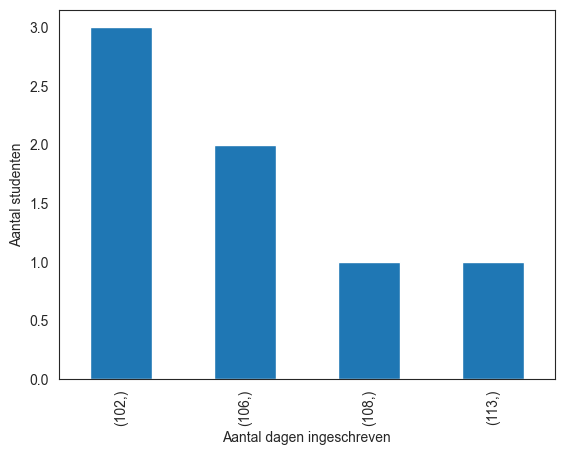

In [203]:
import matplotlib.pyplot as plt

total_days = pd.DataFrame(data["aantal dagen"])
count_genres = total_days.value_counts().plot(kind='bar')
plt.xlabel("Aantal dagen ingeschreven")
plt.ylabel("Aantal studenten")
plt.show()